In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These) I moved the data sets so that it could be called 
#more quickly and so the file path was short
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
all_data = pd.merge(mouse_df, trial_df, on="Mouse ID")



# Display the data table for preview
all_data.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume = all_data.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
tumorvol_df = pd.DataFrame({
    "Tumor Volume (mm3)": tumor_volume["Tumor Volume (mm3)"].mean()
}).reset_index()

#Preview DataFrame
tumorvol_df.head()








,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint and convers to Dataframe
tumor_error = pd.DataFrame({"Tumor Volume SEM": tumor_volume["Tumor Volume (mm3)"].sem()}).reset_index()
# Preview DataFrame
tumor_error.head()


,Drug,Timepoint,Tumor Volume SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Used the pivot function to organize the data better
tumorvol_df = tumorvol_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
tumorvol_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
# Used the pivot function to organize the data better
tumor_error = tumor_error.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume SEM')
#Preview Changes
tumor_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


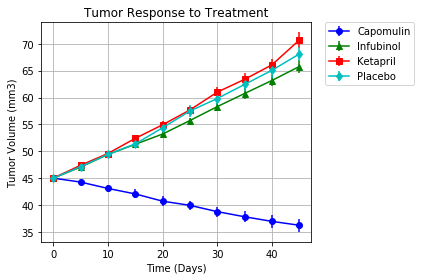

In [6]:
# Generate the Plot (with Error Bars)
#Define X Axis
xaxis = tumorvol_df.index.values
#Define drug names and formatting
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
marker =["o", "^", "s", "d"] 
colors = ["b", 'g', 'r', 'c']
index = -1
#generate for loop to populate the data into plots
for drug in drugs:
    means = tumorvol_df[drug]
    error = tumor_error[drug] 
    index += 1
    markerchoice = marker[index]
    labelchoice = drugs[index]
    colorchoice = colors[index]
    plt.errorbar(xaxis, means, yerr = error, label = labelchoice, marker = markerchoice, color = colorchoice)

#format chart
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid() 
plt.tight_layout()       
# Save the Figure
plt.savefig("Tumor_response.png")


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites = all_data.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
mets_df = pd.DataFrame({
    "Metastatic Sites": tumor_volume["Metastatic Sites"].mean()
}).reset_index()
# Preview DataFrame
mets_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_error = all_data.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
mets_error = pd.DataFrame({
    "Metastatic Sites SEM": tumor_volume["Metastatic Sites"].sem()
}).reset_index()
# Preview DataFrame
mets_error.head()

,Drug,Timepoint,Metastatic Sites SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
mets_df = mets_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
# Preview that Reformatting worked
mets_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Minor Data Munging to Re-Format the Data Frames
# Used the pivot function to organize the data better
mets_error = mets_error.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites SEM')
#Preview data
mets_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


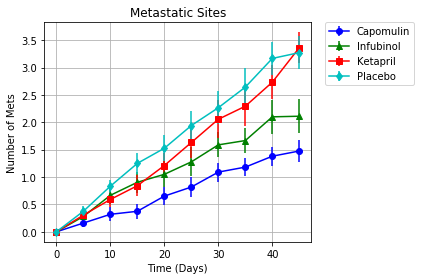

In [12]:
# Generate the Plot (with Error Bars)
#Used similar for loop as above
xaxis = mets_df.index.values
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
marker =["o", "^", "s", "d"] 
colors = ["b", 'g', 'r', 'c']
index = -1
for drug in drugs:
    means = mets_df[drug]
    error = mets_error[drug] 
    index += 1
    markerchoice = marker[index]
    labelchoice = drugs[index]
    colorchoice = colors[index]
    
    plt.errorbar(xaxis, means, yerr = error, label = labelchoice, marker = markerchoice, color = colorchoice)


plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.title('Metastatic Sites')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Mets')
plt.grid()    
plt.tight_layout()
plt.savefig("Metastatic_sites.png")
# Save the Figure

# Show the Figure


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = all_data.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
mouse_count_df = pd.DataFrame({
    "Mouse Numbers": mouse_count["Mouse ID"].count()
}).reset_index()
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Numbers
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df = mouse_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Numbers')
# Preview the Data Frame
mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [15]:
#calculate percentage survival rate per drug group
mouse_percentages = round((1-((mouse_count_df.iloc[0]-mouse_count_df)/mouse_count_df.iloc[0])) * 100, 2)
#Displat new data
mouse_percentages

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


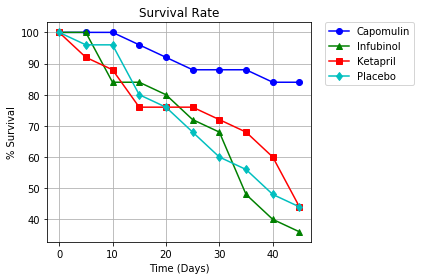

In [16]:
# Generate the Plot (Accounting for percentages)
#Plot using for loop as above
xaxis = mouse_percentages.index.values
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
marker =["o", "^", "s", "d"] 
colors = ["b", 'g', 'r', 'c']
index = -1

for drug in drugs:
    percentages = mouse_percentages[drug] 
    index += 1
    markerchoice = marker[index]
    labelchoice = drugs[index]
    colorchoice = colors[index]
    
    plt.plot(xaxis, percentages, label = labelchoice, marker = markerchoice, color = colorchoice)


plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.title('Survival Rate')
plt.xlabel('Time (Days)')
plt.ylabel('% Survival')
plt.grid() 
plt.tight_layout()
plt.savefig("Survival_rates.png")

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
delta_volume_per_drug = round((tumorvol_df.iloc[-1]-tumorvol_df.iloc[0])/tumorvol_df.iloc[0] * 100, 2)
# Display the data to confirm
delta_volume_per_drug

Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
dtype: float64

In [18]:
#Drop extra drugs from series
delta_volume_4_drugs = delta_volume_per_drug.drop(index = ['Ceftamin','Naftisol', 'Propriva', 'Ramicane', 
'Stelasyn', 'Zoniferol'])
#PRint out series
delta_volume_4_drugs

Drug
Capomulin   -19.48
Infubinol    46.12
Ketapril     57.03
Placebo      51.30
dtype: float64

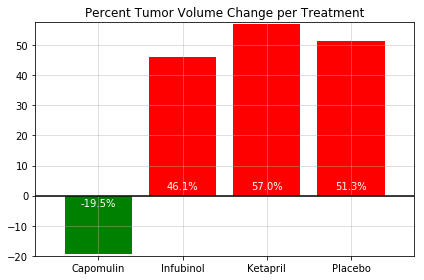

In [19]:
#plot new bar chart graph

xaxis = delta_volume_4_drugs.index
yaxis = delta_volume_4_drugs

#use if statement in line to determine colors           
plt.bar(xaxis, yaxis, color=['red' if yaxis[r] >0 else 'green' for r in np.arange(len(xaxis))], align="center")
plt.xlim(-0.75, len(xaxis)-0.25)
plt.ylim(min(yaxis)-0.5, max(yaxis)+0.5)
plt.grid(alpha = 0.5)
plt.title("Percent Tumor Volume Change per Treatment")
plt.axhline(y=0, color = 'black')
count = 0

#use for loop to determine labelling
for r in yaxis:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1

plt.tight_layout()
plt.savefig("Summary_Bar_Chart.png")



In [20]:
print("Three observable Trends")
print("--------------------------") 
print("1. Capomulin is the only treatment that appears to reduce tumor growth in this mouse cohort. The data also suggests that this drug can reduce tumor size over the time frame investigated")
print() 
print("2. As Capomulin shows efficiacy in prevention of tumor growth it also shows capacity for reduction in metastatic spread of tumor to additional sites. Alternately Ketapril is no motre effective than placebo (i.e. no treatment) at reducing cancer spread")
print()
print("3. Capomulin enhances survival in this mouse model of tumor progression when compared to two additional treatments, which are both shown to be no more/less effective than placebo")


      

Three observable Trends
--------------------------
1. Capomulin is the only treatment that appears to reduce tumor growth in this mouse cohort. The data also suggests that this drug can reduce tumor size over the time frame investigated

2. As Capomulin shows efficiacy in prevention of tumor growth it also shows capacity for reduction in metastatic spread of tumor to additional sites. Alternately Ketapril is no motre effective than placebo (i.e. no treatment) at reducing cancer spread

3. Capomulin enhances survival in this mouse model of tumor progression when compared to two additional treatments, which are both shown to be no more/less effective than placebo
